In [1]:
## https://lashlock.github.io/compbio/R_presentation.html

In [3]:
# Store current verbose option
suppressPackageStartupMessages({
    library(DESeq2,quietly = TRUE)
    library(ggplot2,quietly = TRUE)
    library(pheatmap)
})

## read input count data

In [3]:
countData <- read.csv('all_samples_count.tsv', header = TRUE, sep = "\t")
head(countData)

,target_id,B1,B2,B3,B4,B5,B6,B7,B8,B9,⋯,rerun_V1,rerun_V10,rerun_V2,rerun_V3,rerun_V4,rerun_V5,rerun_V6,rerun_V7,rerun_V8,rerun_V9
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NLLv2_murdoch00001.1,0,0,0,0,0.00000,0,0,2.00000,0,⋯,0,0,0,0,0,0,0,0,0,0
2,NLLv2_murdoch00002.1,0,0,1,0,3.00345,0,0,1.00145,0,⋯,0,0,0,0,0,0,0,0,0,0
3,NLLv2_murdoch00003.1,3931,2906,3956,4152,2883.00000,5299,7927,3312.00000,5474,⋯,1358,1587,2922,782,742,1139,1150,1293,1318,1867
4,NLLv2_murdoch00004.1,137,210,262,235,297.00000,382,257,343.00000,371,⋯,116,145,317,84,34,134,131,96,77,70
5,NLLv2_murdoch00005.1,2450,3257,3071,3469,3436.00000,4203,1633,3833.00000,4673,⋯,2157,2640,4322,1313,1187,2311,2163,1391,1318,2139
6,NLLv2_murdoch00006.1,5230,4701,4664,7024,4443.00000,6101,7119,5765.00000,7070,⋯,2783,3587,6875,1639,1672,2955,2905,2775,2452,3311


## filter sample and create trait matrix

In [7]:
as.list(names(countData))

[[1]]
[1] "target_id"

[[2]]
[1] "B1"

[[3]]
[1] "B2"

[[4]]
[1] "B3"

[[5]]
[1] "B4"

[[6]]
[1] "B5"

[[7]]
[1] "B6"

[[8]]
[1] "B7"

[[9]]
[1] "B8"

[[10]]
[1] "B9"

[[11]]
[1] "S1"

[[12]]
[1] "S10"

[[13]]
[1] "S11"

[[14]]
[1] "S2"

[[15]]
[1] "S3"

[[16]]
[1] "S4"

[[17]]
[1] "S5"

[[18]]
[1] "S6"

[[19]]
[1] "S7"

[[20]]
[1] "S8"

[[21]]
[1] "S9"

[[22]]
[1] "SRR1578066_1"

[[23]]
[1] "SRR1578080_1"

[[24]]
[1] "SRR1578084_1"

[[25]]
[1] "SRR1578087_1"

[[26]]
[1] "SRR1578089_1"

[[27]]
[1] "SRR5723679_1"

[[28]]
[1] "SRR5723680_1"

[[29]]
[1] "SRR5723681_1"

[[30]]
[1] "SRR5723682_1"

[[31]]
[1] "SRR6315853_1"

[[32]]
[1] "rerun_V1"

[[33]]
[1] "rerun_V10"

[[34]]
[1] "rerun_V2"

[[35]]
[1] "rerun_V3"

[[36]]
[1] "rerun_V4"

[[37]]
[1] "rerun_V5"

[[38]]
[1] "rerun_V6"

[[39]]
[1] "rerun_V7"

[[40]]
[1] "rerun_V8"

[[41]]
[1] "rerun_V9"

In [12]:
setdiff(2:21, c(3,4,7))

[1]  2  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21

In [9]:
4:7

[1] 4 5 6 7

In [24]:
column_indices_to_keep <- setdiff(1:21, c(7,8,12,17))

In [25]:
column_indices_to_keep

[1]  1  2  3  4  5  6  9 10 11 13 14 15 16 18 19 20 21

In [26]:
countData_small <- countData[, column_indices_to_keep, drop = FALSE]
#rownames(countData_small) <- countData$target_id
head(countData_small)

,target_id,B1,B2,B3,B4,B5,B8,B9,S1,S11,S2,S3,S4,S6,S7,S8,S9
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NLLv2_murdoch00001.1,0,0,0,0,0.00000,2.00000,0,0,0,0,0,0,0,0,1,2
2,NLLv2_murdoch00002.1,0,0,1,0,3.00345,1.00145,0,0,2,1,0,0,0,0,1,1
3,NLLv2_murdoch00003.1,3931,2906,3956,4152,2883.00000,3312.00000,5474,7193,3544,1456,2148,8599,5536,3467,3700,5168
4,NLLv2_murdoch00004.1,137,210,262,235,297.00000,343.00000,371,244,362,138,169,577,422,87,268,344
5,NLLv2_murdoch00005.1,2450,3257,3071,3469,3436.00000,3833.00000,4673,1209,4486,1740,2572,7514,4961,1758,3523,3764
6,NLLv2_murdoch00006.1,5230,4701,4664,7024,4443.00000,5765.00000,7070,7198,5176,2424,3740,11869,7164,4055,6213,6345


In [31]:
# Convert numeric values to integers
countData_small_int <- countData_small
numeric_cols <- sapply(countData_small, is.numeric)  # Identify numeric columns
countData_small_int[numeric_cols] <- lapply(countData_small_int[numeric_cols], as.integer)
head(countData_small_int)

,target_id,B1,B2,B3,B4,B5,B8,B9,S1,S11,S2,S3,S4,S6,S7,S8,S9
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NLLv2_murdoch00001.1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,2
2,NLLv2_murdoch00002.1,0,0,1,0,3,1,0,0,2,1,0,0,0,0,1,1
3,NLLv2_murdoch00003.1,3931,2906,3956,4152,2883,3312,5474,7193,3544,1456,2148,8599,5536,3467,3700,5168
4,NLLv2_murdoch00004.1,137,210,262,235,297,343,371,244,362,138,169,577,422,87,268,344
5,NLLv2_murdoch00005.1,2450,3257,3071,3469,3436,3833,4673,1209,4486,1740,2572,7514,4961,1758,3523,3764
6,NLLv2_murdoch00006.1,5230,4701,4664,7024,4443,5765,7070,7198,5176,2424,3740,11869,7164,4055,6213,6345


In [28]:
trait <- c(rep("bitter", 7), rep("sweet", 9))
sample_trait <- data.frame("ID" = colnames(countData_small)[-1],"trait" = trait)
head(sample_trait)

,ID,trait
,<chr>,<chr>
1,B1,bitter
2,B2,bitter
3,B3,bitter
4,B4,bitter
5,B5,bitter
6,B8,bitter


## run DESeq

In [33]:
# Construct DESEQDataSet Object
dds <- DESeqDataSetFromMatrix(countData=countData_small_int, 
                              colData=sample_trait, 
                              design=~trait, tidy = TRUE)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [34]:
dds

class: DESeqDataSet 
dim: 67183 16 
metadata(1): version
assays(1): counts
rownames(67183): NLLv2_murdoch00001.1 NLLv2_murdoch00002.1 ...
  NLLv2_murdoch53366.1 NLLv2_murdoch53367.1
rowData names(0):
colnames(16): B1 B2 ... S8 S9
colData names(2): ID trait

In [35]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 1936 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [36]:
res <- results(dds)
head(results(dds, tidy=TRUE)) #let's look at the results table

,row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NLLv2_murdoch00001.1,0.2832443,0.24728125,3.0804723,0.08027381,0.9360195,NA
2,NLLv2_murdoch00002.1,0.7128526,-0.35982258,1.4562893,-0.24708179,0.8048449,NA
3,NLLv2_murdoch00003.1,3924.8864614,0.14580989,0.1679118,0.86837203,0.3851907,0.9999479
4,NLLv2_murdoch00004.1,260.2398552,0.00543621,0.2208339,0.02461673,0.9803607,0.9999479
5,NLLv2_murdoch00005.1,3285.1377625,-0.07835554,0.2232173,-0.35102813,0.7255672,0.9999479
6,NLLv2_murdoch00006.1,5464.6457671,0.03103232,0.0600654,0.51664211,0.6054060,0.9999479


In [37]:
summary(res) #summary of results


out of 58383 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 39, 0.067%
LFC < 0 (down)     : 155, 0.27%
outliers [1]       : 0, 0%
low counts [2]     : 10590, 18%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [38]:
# Sort summary list by p-value
res <- res[order(res$padj),]
head(res)

log2 fold change (MLE): trait sweet vs bitter 
Wald test p-value: trait sweet vs bitter 
DataFrame with 6 rows and 6 columns
                      baseMean log2FoldChange     lfcSE      stat      pvalue
                     <numeric>      <numeric> <numeric> <numeric>   <numeric>
NLLv2_murdoch18021.1  318.7031       -2.56527  0.299676  -8.56013 1.12744e-17
NLLv2_murdoch23515.2   58.3379       23.04116  2.683308   8.58685 8.93882e-18
NLLv2_murdoch51533.1   18.2065      -23.53166  2.987821  -7.87586 3.38409e-15
NLLv2_murdoch33278.3   14.4621      -23.22178  2.988130  -7.77134 7.76589e-15
NLLv2_murdoch32374.2   39.3777       22.80847  3.009271   7.57940 3.47155e-14
NLLv2_murdoch08622.2   24.7286       22.35416  3.009627   7.42755 1.10626e-13
                            padj
                       <numeric>
NLLv2_murdoch18021.1 2.72141e-13
NLLv2_murdoch23515.2 2.72141e-13
NLLv2_murdoch51533.1 5.44568e-11
NLLv2_murdoch33278.3 9.37265e-11
NLLv2_murdoch32374.2 3.35185e-10
NLLv2_murdoch08622.2

In [45]:
nrow(subset(res, padj<.01 ))

[1] 38

In [50]:
write.csv(res, "sorted_DEseq2.csv", row.names = TRUE)

## plot Counts

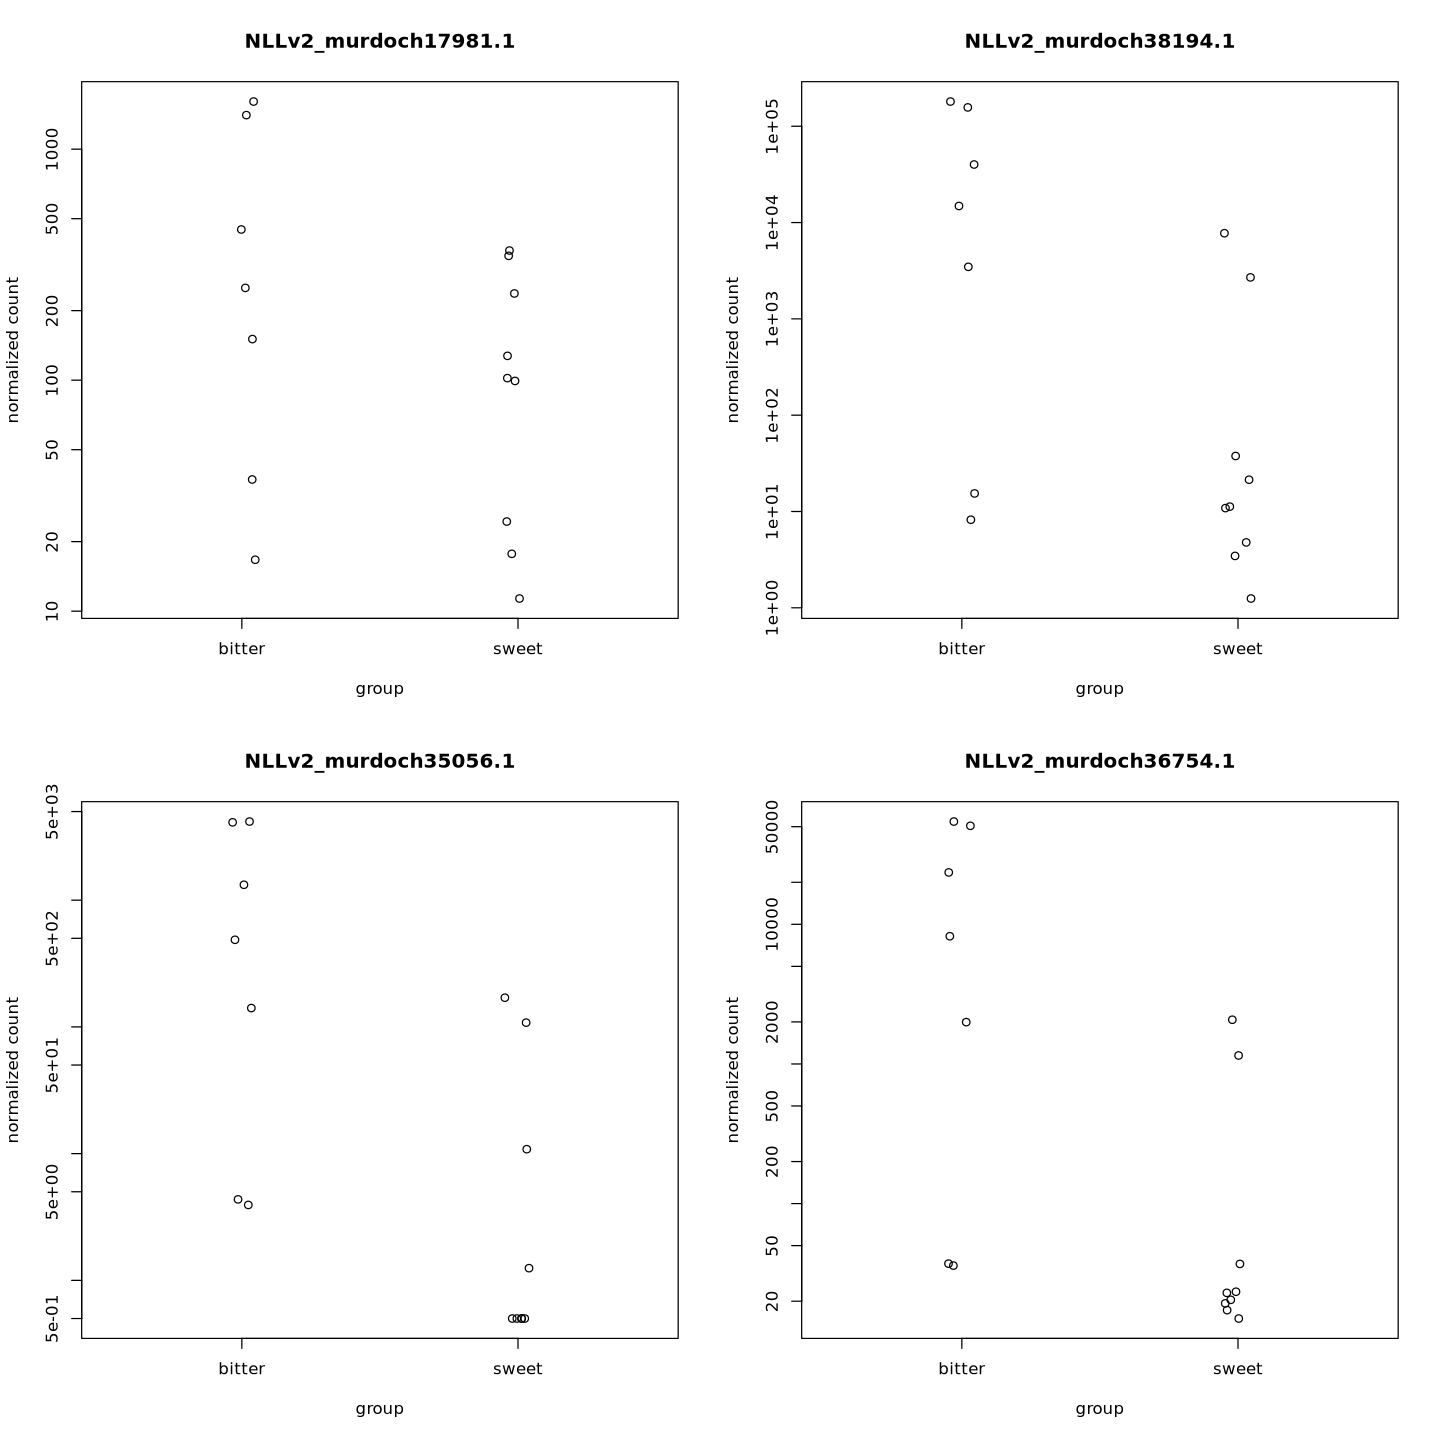

In [42]:
# Set the plot size
options(repr.plot.width=12, repr.plot.height=12)

#we can use plotCounts fxn to compare the normalized counts
#between treated and control groups for our top 6 genes
par(mfrow=c(2,2))

plotCounts(dds, gene="NLLv2_murdoch17981.1", intgroup="trait")
plotCounts(dds, gene="NLLv2_murdoch38194.1", intgroup="trait")
plotCounts(dds, gene="NLLv2_murdoch35056.1", intgroup="trait")
plotCounts(dds, gene="NLLv2_murdoch36754.1", intgroup="trait")

## Volvano plot

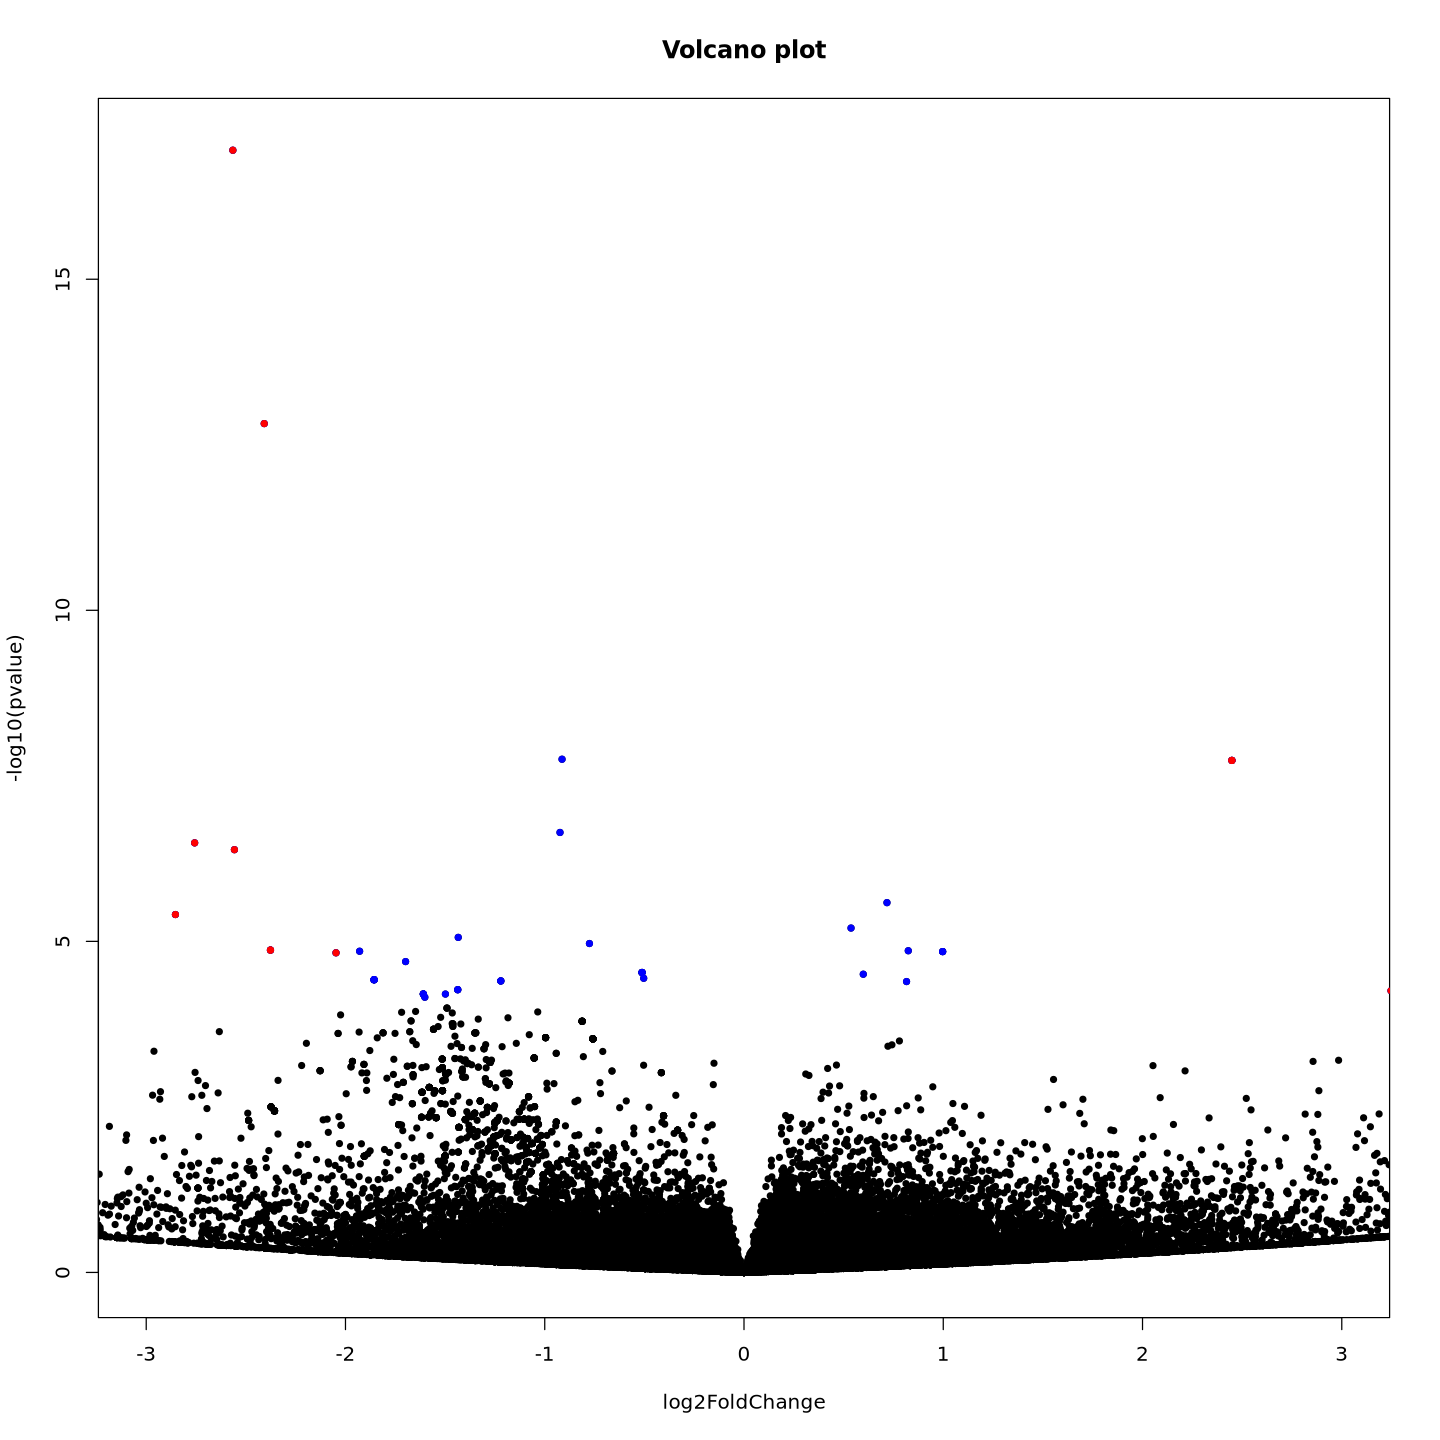

In [47]:
#reset par
par(mfrow=c(1,1))
# Make a basic volcano plot
with(res, plot(log2FoldChange, -log10(pvalue), pch=20, main="Volcano plot", xlim=c(-3,3)))

# Add colored points: blue if padj<0.01, red if log2FC>1 and padj<0.05)
with(subset(res, padj<.05 ), points(log2FoldChange, -log10(pvalue), pch=20, col="blue"))
with(subset(res, padj<.05 & abs(log2FoldChange)>2), points(log2FoldChange, -log10(pvalue), pch=20, col="red"))

## PCA

In [48]:
#First we need to transform the raw count data
#vst function will perform variance stabilizing transformation

vsdata <- vst(dds, blind=FALSE)

using ntop=500 top features by variance



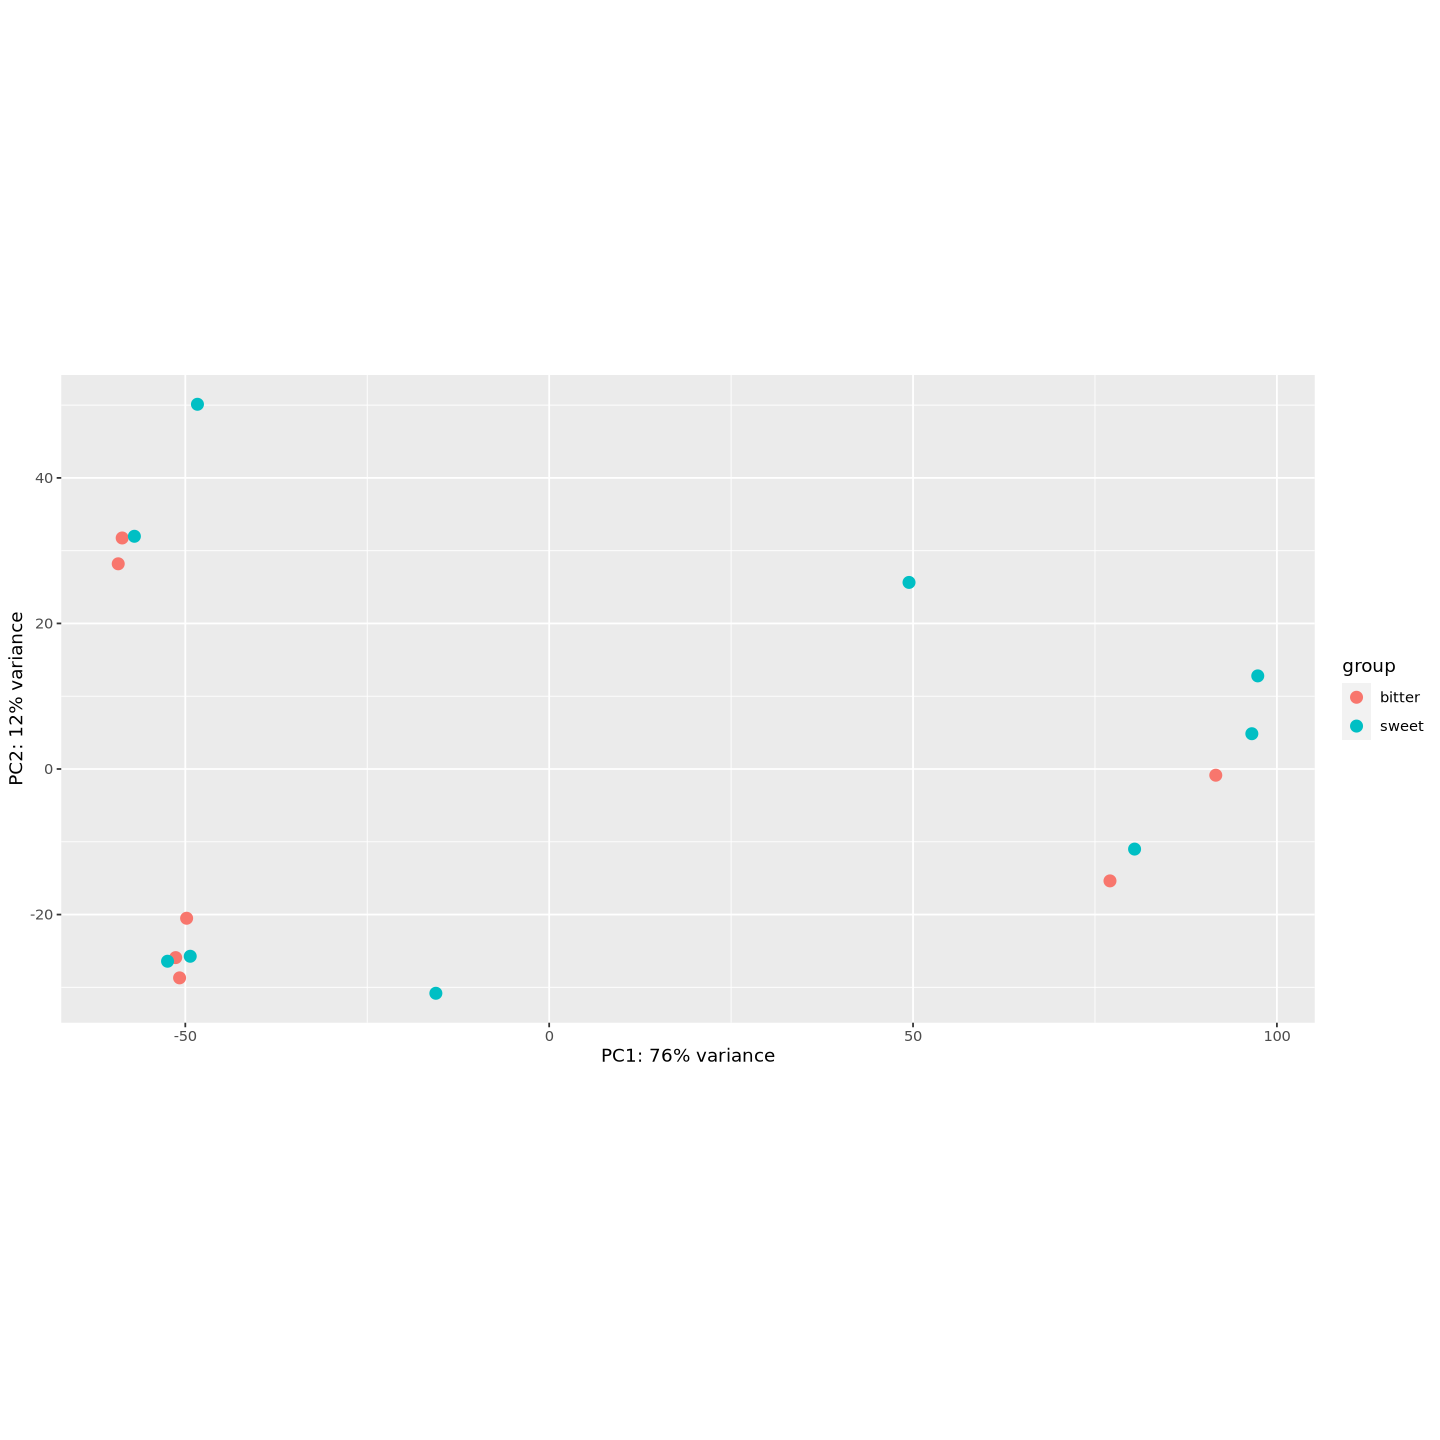

In [49]:
plotPCA(vsdata, intgroup="trait") #using the DESEQ2 plotPCA fxn we can